# Le pouvoir d'achat des ouvriers anglais du XVIe au XIX siècle

[William Playfair](https://fr.wikipedia.org/wiki/William_Playfair) était un des pionniers de la présentation graphique des données. Il est notamment considéré comme l'inventeur de l'histogramme. 
Un de ses graphes célèbres, tiré de son livre ["A Letter on Our Agricultural Distresses, Their Causes and Remedies"](https://books.google.fr/books/about/A_Letter_on_Our_Agricultural_Distresses.html?id=aQZGAQAAMAAJ), montre [l'évolution du prix du blé et du salaire moyen entre 1565 et 1821](https://fr.wikipedia.org/wiki/William_Playfair#/media/File:Chart_Showing_at_One_View_the_Price_of_the_Quarter_of_Wheat,_and_Wages_of_Labour_by_the_Week,_from_1565_to_1821.png). Playfair n'a pas publié les données numériques brutes qu'il a utilisées, car à son époque la réplicabilité n'était pas encore considérée comme essentielle. Des [valeurs obtenues par numérisation du graphe](https://vincentarelbundock.github.io/Rdatasets/doc/HistData/Wheat.html) sont aujourd'hui téléchargeables, la [version en format CSV](https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Wheat.csv) étant la plus pratique.


Quelques remarques pour la compréhension des données :
* Jusqu'en 1971, la livre sterling était divisée en 20 shillings, et un shilling en 12 pences.
* Le prix du blé est donné en shillings pour un quart de boisseau de blé. Un quart de boisseau équivaut 15 livres britanniques ou 6,8 kg.
* Les salaires sont donnés en shillings par semaine.

## Reproduction du graphe de Playfair à partir des données numériques

Il s'agit de:
* Représenter, comme Playfair, le prix du blé par des barres et les salaires par une surface bleue délimitée par une courbe rouge. 
* Superposer les deux de la même façon dans un seul graphique. 
Le style du graphique pourra rester différent par rapport à l'original, mais l'impression globale devrait être la même.

Pour créer un graphique représentant le prix du blé par des barres et les salaires par une surface bleue délimitée par une courbe rouge, vous pouvez utiliser la bibliothèque `pandas` pour manipuler les données et `matplotlib` pour créer le graphique.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

Chargement des données depuis l'URL

In [47]:
data_url = "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Wheat.csv"

In [49]:
raw_data = pd.read_csv(data_url)
raw_data

rownames  Year  Wheat  Wages
0          1  1565   41.0   5.00
1          2  1570   45.0   5.05
2          3  1575   42.0   5.08
3          4  1580   49.0   5.12
4          5  1585   41.5   5.15
5          6  1590   47.0   5.25
6          7  1595   64.0   5.54
7          8  1600   27.0   5.61
8          9  1605   33.0   5.69
9         10  1610   32.0   5.78
10        11  1615   33.0   5.94
11        12  1620   35.0   6.01
12        13  1625   33.0   6.12
13        14  1630   45.0   6.22
14        15  1635   33.0   6.30
15        16  1640   39.0   6.37
16        17  1645   53.0   6.45
17        18  1650   42.0   6.50
18        19  1655   40.5   6.60
19        20  1660   46.5   6.75
20        21  1665   32.0   6.80
21        22  1670   37.0   6.90
22        23  1675   43.0   7.00
23        24  1680   35.0   7.30
24        25  1685   27.0   7.60
25        26  1690   40.0   8.00
26        27  1695   50.0   8.50
27        28  1700   30.0   9.00
28        29  1705   32.0  10.00
29        30  1710   44.0  11.00
30        31  1715   33.0  11.75
31        32  1720   29.0  12.50
32        33  1725   39.0  13.00
33        34  1730   26.0  13.30
34        35  1735   32.0  13.60
35        36  1740   27.0  14.00
36        37  1745   27.5  14.50
37        38  1750   31.0  15.00
38        39  1755   35.5  15.70
39        40  1760   31.0  16.50
40        41  1765   43.0  17.60
41        42  1770   47.0  18.50
42        43  1775   44.0  19.50
43        44  1780   46.0  21.00
44        45  1785   42.0  23.00
45        46  1790   47.5  25.50
46        47  1795   76.0  27.50
47        48  1800   79.0  28.50
48        49  1805   81.0  29.50
49        50  1810   99.0  30.00
50        51  1815   78.0    NaN
51        52  1820   54.0    NaN
52        53  1821   54.0    NaN

Y a-t-il des points manquants dans ce jeux de données ? Oui, les années 1815, 1820 et 1821 n'ont pas de valeurs associées pour les salaires.

In [50]:
raw_data[raw_data.isnull().any(axis=1)]

rownames  Year  Wheat  Wages
50        51  1815   78.0    NaN
51        52  1820   54.0    NaN
52        53  1821   54.0    NaN

Nous éliminons ces points, ce qui n'a pas d'impact fort sur notre analyse.

In [51]:
data = raw_data.dropna().copy()
data

rownames  Year  Wheat  Wages
0          1  1565   41.0   5.00
1          2  1570   45.0   5.05
2          3  1575   42.0   5.08
3          4  1580   49.0   5.12
4          5  1585   41.5   5.15
5          6  1590   47.0   5.25
6          7  1595   64.0   5.54
7          8  1600   27.0   5.61
8          9  1605   33.0   5.69
9         10  1610   32.0   5.78
10        11  1615   33.0   5.94
11        12  1620   35.0   6.01
12        13  1625   33.0   6.12
13        14  1630   45.0   6.22
14        15  1635   33.0   6.30
15        16  1640   39.0   6.37
16        17  1645   53.0   6.45
17        18  1650   42.0   6.50
18        19  1655   40.5   6.60
19        20  1660   46.5   6.75
20        21  1665   32.0   6.80
21        22  1670   37.0   6.90
22        23  1675   43.0   7.00
23        24  1680   35.0   7.30
24        25  1685   27.0   7.60
25        26  1690   40.0   8.00
26        27  1695   50.0   8.50
27        28  1700   30.0   9.00
28        29  1705   32.0  10.00
29        30  1710   44.0  11.00
30        31  1715   33.0  11.75
31        32  1720   29.0  12.50
32        33  1725   39.0  13.00
33        34  1730   26.0  13.30
34        35  1735   32.0  13.60
35        36  1740   27.0  14.00
36        37  1745   27.5  14.50
37        38  1750   31.0  15.00
38        39  1755   35.5  15.70
39        40  1760   31.0  16.50
40        41  1765   43.0  17.60
41        42  1770   47.0  18.50
42        43  1775   44.0  19.50
43        44  1780   46.0  21.00
44        45  1785   42.0  23.00
45        46  1790   47.5  25.50
46        47  1795   76.0  27.50
47        48  1800   79.0  28.50
48        49  1805   81.0  29.50
49        50  1810   99.0  30.00

Nous définissons les années d'observation comme nouvel index de notre jeux de données. Ceci en fait une suite chronologique, ce qui sera pratique par la suite. Ensuite, nous trions les points par période, dans le sens chronologique.

In [71]:
sorted_data = data.set_index('Year').sort_index()

Nous vérifions la cohérence des données. Entre la fin d'une période et le début de la période qui suit, la différence temporelle doit être 5.

In [77]:
Year = sorted_data.index
for Y1, Y2 in zip(Year[:-1], Year[1:]):
    delta = Y2 - Y1
    if delta != 5:
        print(Y1, Y2)

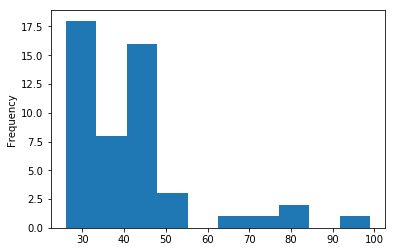

In [78]:
sorted_data['Wheat'].plot.hist()

Création d'un graphique avec deux axes y

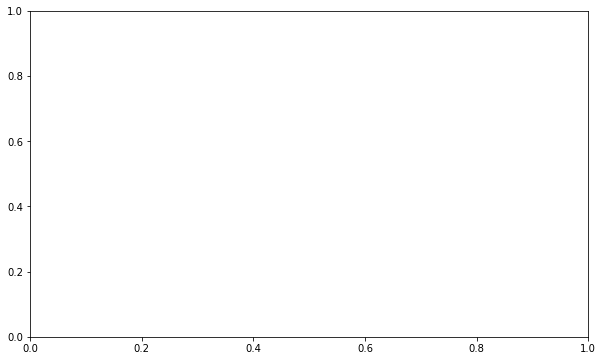

In [52]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ValueError: '5' is not a valid estimator for `bins`

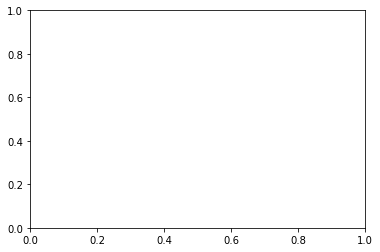

In [68]:
plt.hist(df['Wheat'], bins='5', color='tan', edgecolor='black')

Barres pour le prix du blé

In [59]:
ax1.bar(df['Year'], df['Wheat'], color='tan', edgecolor='black', width=1, label='Wheat')
ax1.set_xlabel('Année')
ax1.set_ylabel('Wheat', color='brown')
ax1.tick_params('y', colors='brown')

Création d'un deuxième axe y pour les salaires

In [60]:
ax2 = ax1.twinx()
ax2.plot(df['Year'], df['Wages'], color='red', marker='o', label='Wages')
ax2.fill_between(df['Year'], 0, df['Wages'], color='lightblue')
ax2.set_ylabel('Wages', color='red')
ax2.tick_params('y', colors='red')

Titre du graphique

Text(0.5,1,'Prix du blé et Salaires au fil du temps (1565-1821)')

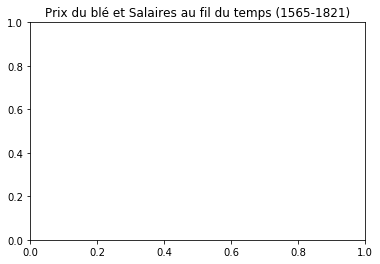

In [55]:
plt.title('Prix du blé et Salaires au fil du temps (1565-1821)')

Légende

In [56]:
fig.tight_layout()
fig.legend(loc='upper left')

Afficher le graphique

In [61]:
for i, row in df.iterrows():
    ax1.text(row['Year'], row['Wheat'], f"{row['Wheat']:.1f}", ha='center', va='bottom', color='black')
    ax2.text(row['Year'], row['Wages'], f"{row['Wages']:.1f}", ha='center', va='top', color='black')

In [62]:
plt.show()